## Modeling Notebook

In [20]:
import pandas as pd
import yfinance as yf
from yahooquery import Ticker
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [21]:
# Reading in most recent data
stock_data = pd.read_csv('data/RevandEbitda.csv')
stock_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
stock_data.head()

,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA
0,A,166.50,14,138.09,4.088458e+10,0.206,0,4.930681e+10,6.848000e+09,1.985000e+09
1,AA,50.00,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09
2,AADI,37.00,3,7.20,1.756447e+08,4.139,1,9.026382e+08,1.000000e+06,-3.535800e+07
3,AAL,16.62,14,13.89,1.862496e+10,0.197,0,2.229408e+10,4.897100e+10,1.423200e+10
4,AAN,16.00,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08


We're now ready to set up our first model

In [22]:
first_model_df = stock_data[['Ticker', 'TotalRevenue', 'NormEBITDA','OverallRecommendation']]
first_model_df.set_index('Ticker', inplace = True)

In [23]:
X = first_model_df.drop(['OverallRecommendation'], axis = 1)
y = first_model_df['OverallRecommendation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 42)

In [24]:
smt = SMOTE(random_state = 42)
ss = StandardScaler()
rfc = RandomForestClassifier(random_state = 42)
rfc_pipeline = Pipeline([('smote', smt),('scaler', ss),('random_forest',rfc)])

0.5363777089783281


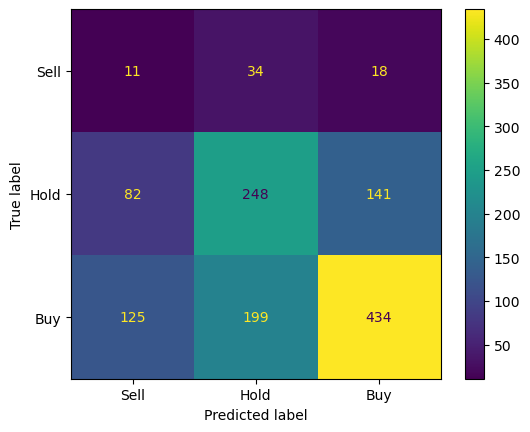

In [25]:
rfc_pipeline.fit(X_train, y_train)
y_pred = rfc_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
ConfusionMatrixDisplay(cm, display_labels= ['Sell','Hold','Buy']).plot()